Enter the number of white stones: 4
Box (0 for White / 1 for Black):  0 0 0 0 1 
Enter the number of extractions: 75


Trial,Event,H0,H1,H2,H3,H4,H5
0,-,0.1666667,0.166666666666666657,0.16666666667,0.166666667,0.16666667,0.1666667
1,0,0.0000000,0.066666666666666666,0.13333333333,0.200000000,0.26666667,0.3333333
2,0,0.0000000,0.018181818181818184,0.07272727273,0.163636364,0.29090909,0.4545455
3,0,0.0000000,0.004444444444444445,0.03555555556,0.120000000,0.28444444,0.5555556
4,0,0.0000000,0.001021450459652707,0.01634320735,0.082737487,0.26149132,0.6384065
5,0,0.0000000,0.000225988700564972,0.00723163842,0.054915254,0.23141243,0.7062147
6,0,0.0000000,0.000048744820862783,0.00311966854,0.035534974,0.19965879,0.7616378
7,0,0.0000000,0.000010327911179964,0.00132197263,0.022587142,0.16921250,0.8068681
8,0,0.0000000,0.000002159925180192,0.00055294085,0.014171269,0.14155286,0.8437208
9,0,0.0000000,0.000000447334223528,0.00022903512,0.008804880,0.11726598,0.8736997


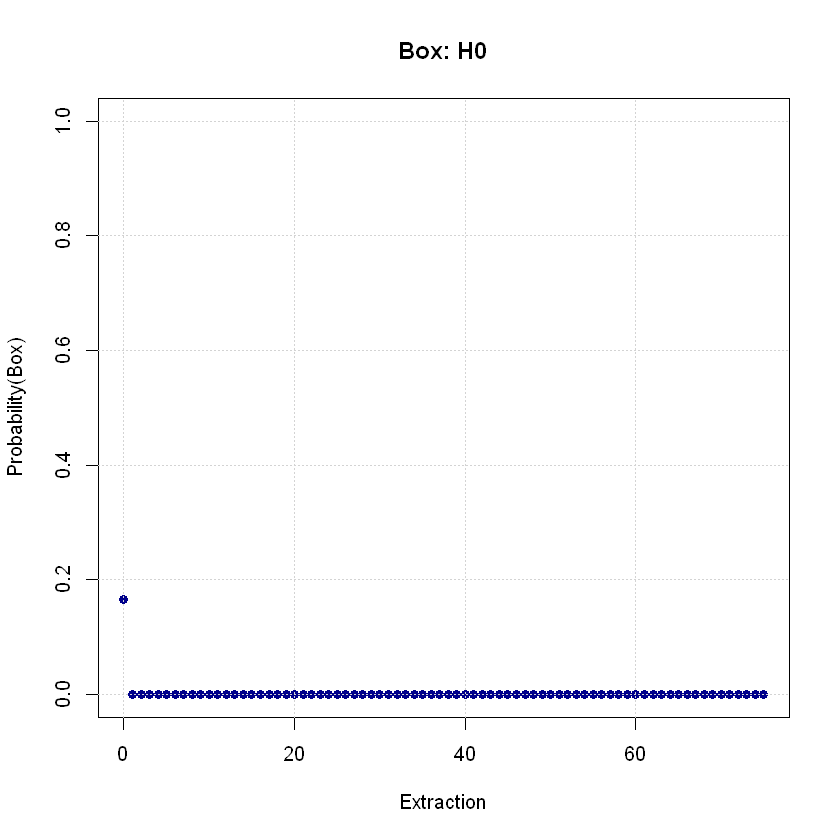

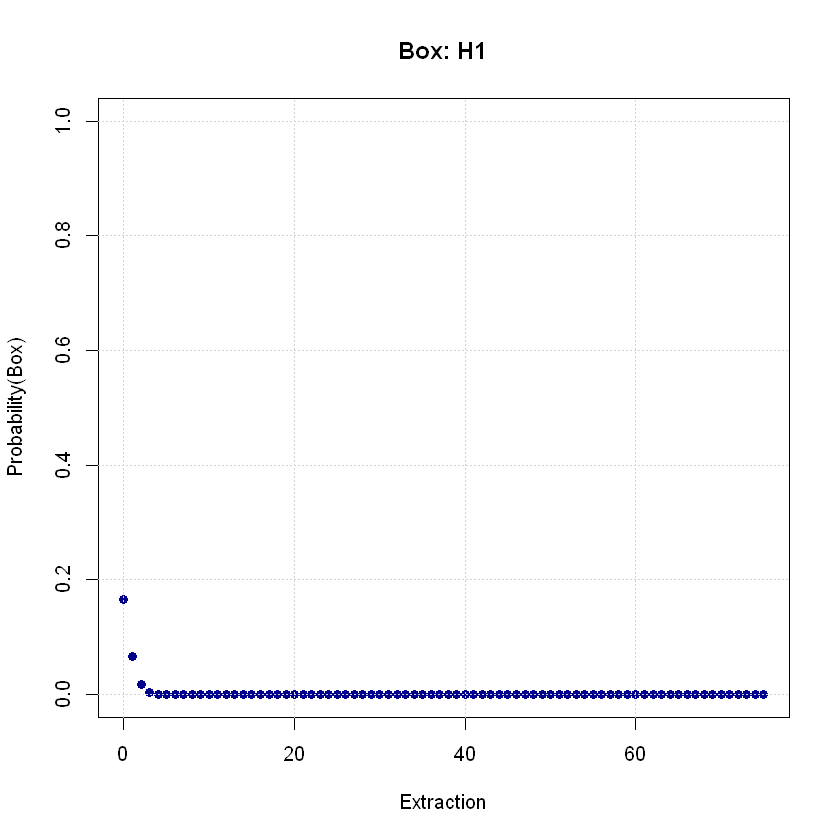

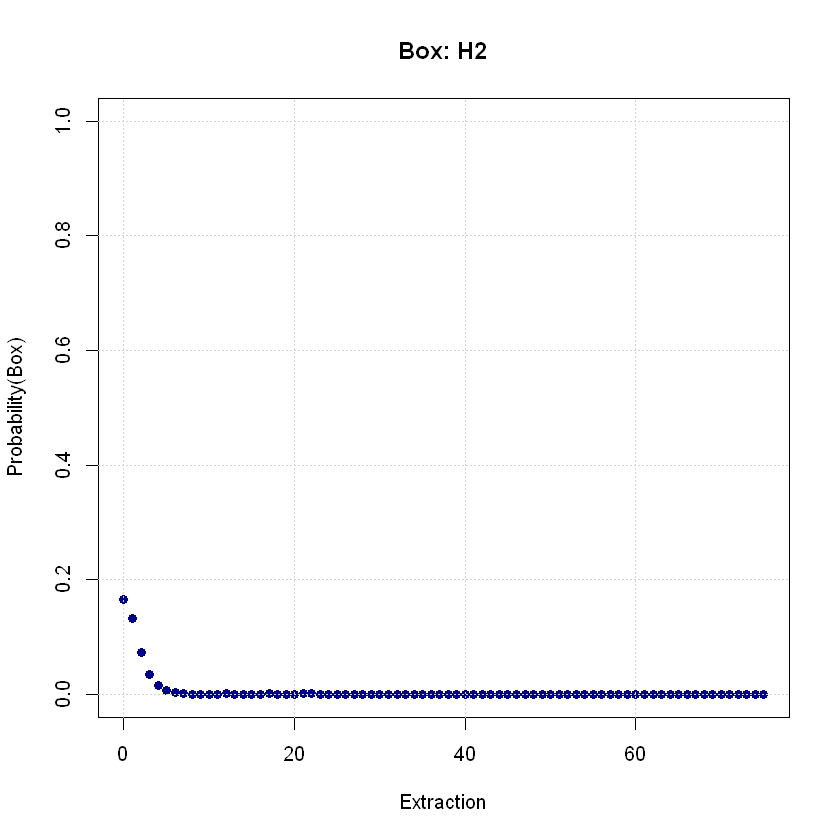

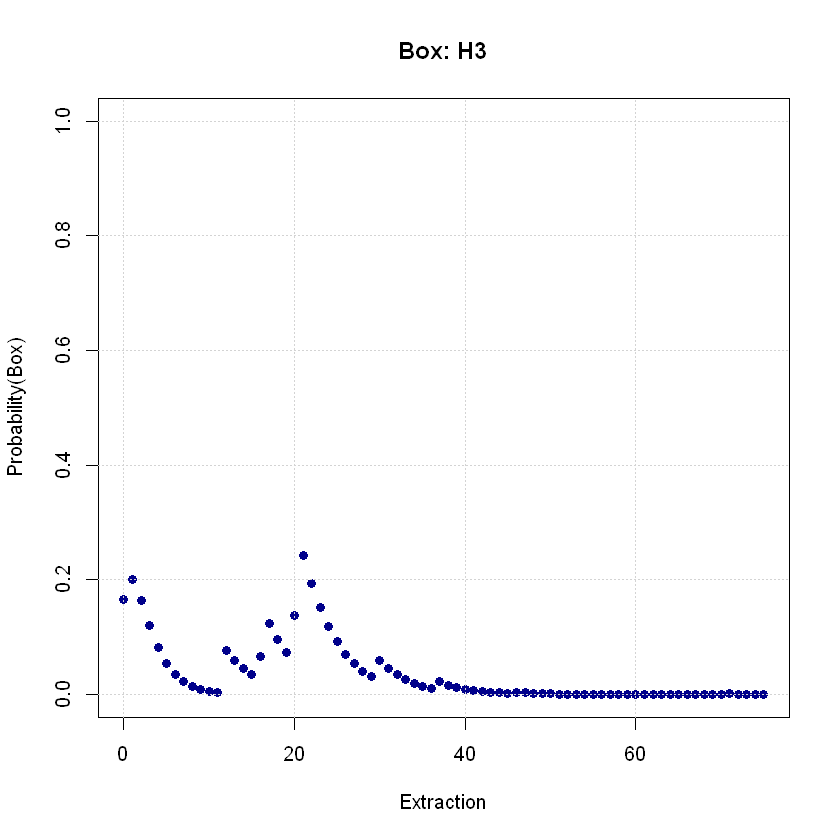

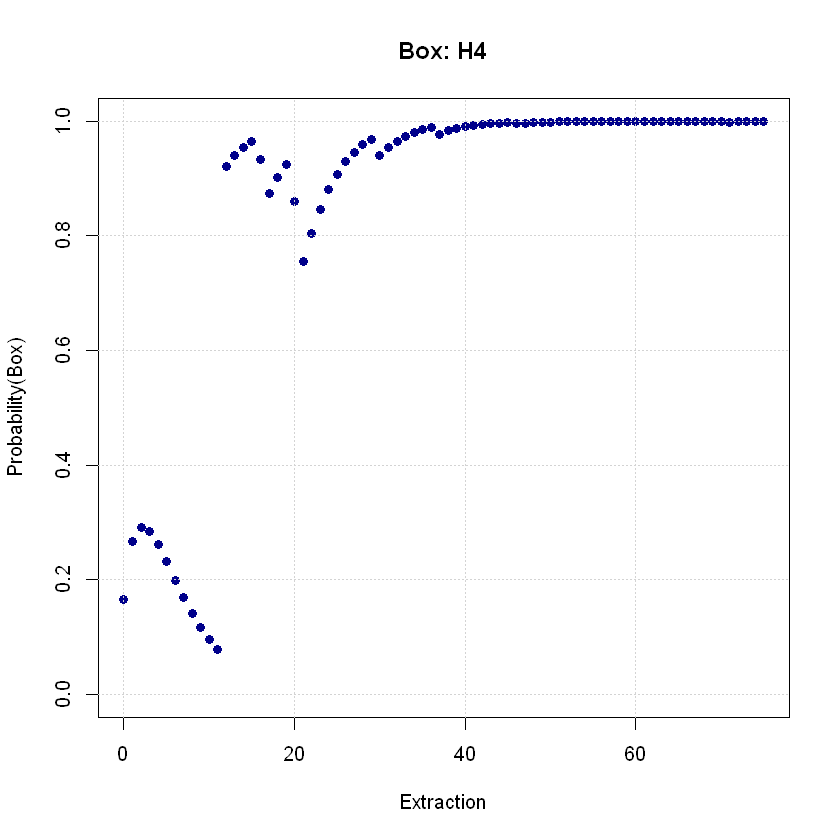

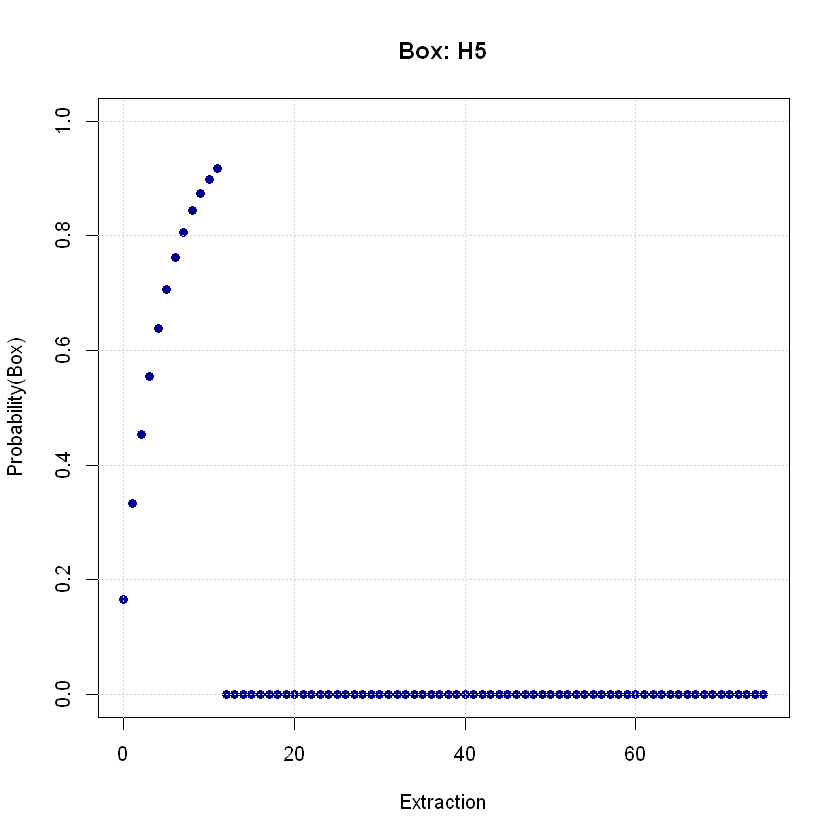

In [9]:
library(tidyverse)
Box<-readline(prompt="Enter the number of white stones: ") %>% as.numeric()
H<-c(rep(0, Box), rep(1, 5-Box))
cat("Box (0 for White / 1 for Black): ", H, "\n")
iter<-readline(prompt="Enter the number of extractions: ") %>% as.numeric()


White<-function(T, k){
    i<-0:5
    E<-sum((i/5)*T[k, i+3])
    for(j in 0:5){
        T[k+1, j+3]<-((j/5)*T[k, j+3])/E
    }
    return(T)
}
Black<-function(T, k){
    i<-0:5
    E<-sum(((5-i)/5)*T[k, i+3])
    for(j in 0:5){
        T[k+1, j+3]<-(((5-j)/5)*T[k, j+3])/E
    }
    return(T)
}
P<-function(T, i){
    plot(x=T[[1]], y=T[[i]], cex=1, pch=19,  col="darkblue", xlab="Extraction", 
         ylab="Probability(Box)", main = paste("Box:", names(T[i])), ylim=range(0, 1))
    grid()
}


PH<-tibble("Trial"=0, "Event"="-", "H0"=1/6, "H1"=1/6, "H2"=1/6, "H3"=1/6, "H4"=1/6, "H5"=1/6)
set.seed(89540)
Random<-sample(1:5, size=iter, replace=TRUE)     
for(k in 1:iter){
    PH<-add_row(PH, "Trial"=k, "Event"=H[Random[k]])
    if(H[Random[k]]==1){
        PH<-Black(PH, k)
    }else{
        PH<-White(PH, k)
    }
}
PH
for(i in 3:8){P(PH, i)}



Box:  0 0 1 1 1 
Enter the number of extractions: 150


Trial,Event,H0,H1,H2,H3,H4,H5
0,-,0.1666667,0.166666667,0.1666667,0.16666667,1.666667e-01,0.1666667
1,0,0.0000000,0.066666667,0.1333333,0.20000000,2.666667e-01,0.3333333
2,1,0.0000000,0.200000000,0.3000000,0.30000000,2.000000e-01,0.0000000
3,0,0.0000000,0.080000000,0.2400000,0.36000000,3.200000e-01,0.0000000
4,0,0.0000000,0.027397260,0.1643836,0.36986301,4.383562e-01,0.0000000
5,0,0.0000000,0.008510638,0.1021277,0.34468085,5.446809e-01,0.0000000
6,1,0.0000000,0.021621622,0.1945946,0.43783784,3.459459e-01,0.0000000
7,1,0.0000000,0.045714286,0.3085714,0.46285714,1.828571e-01,0.0000000
8,1,0.0000000,0.082474227,0.4175258,0.41752577,8.247423e-02,0.0000000
9,1,0.0000000,0.131958763,0.5010309,0.33402062,3.298969e-02,0.0000000


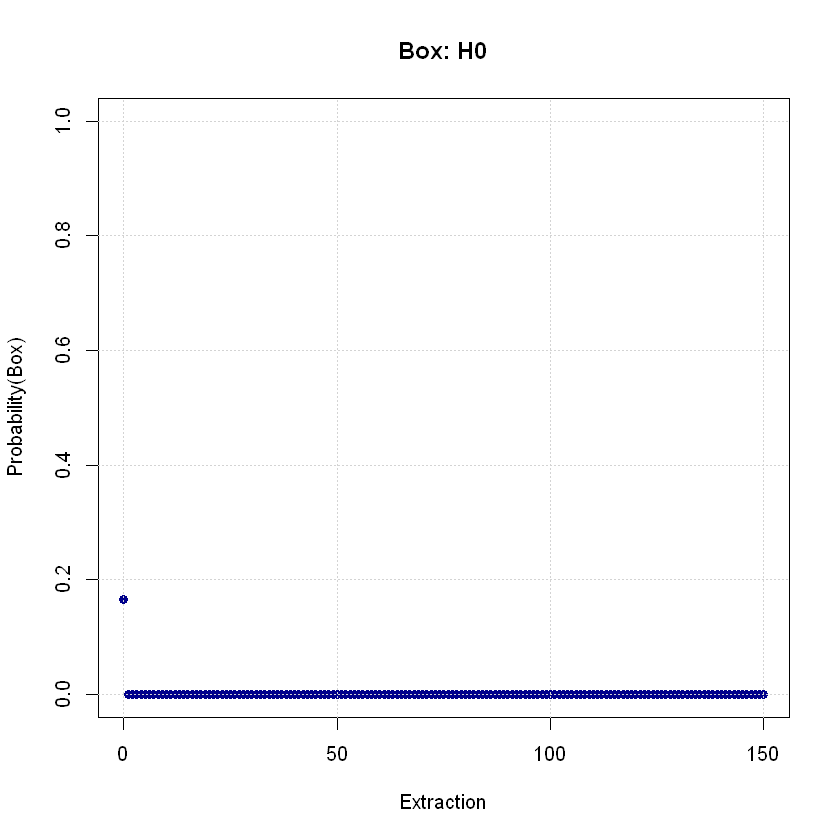

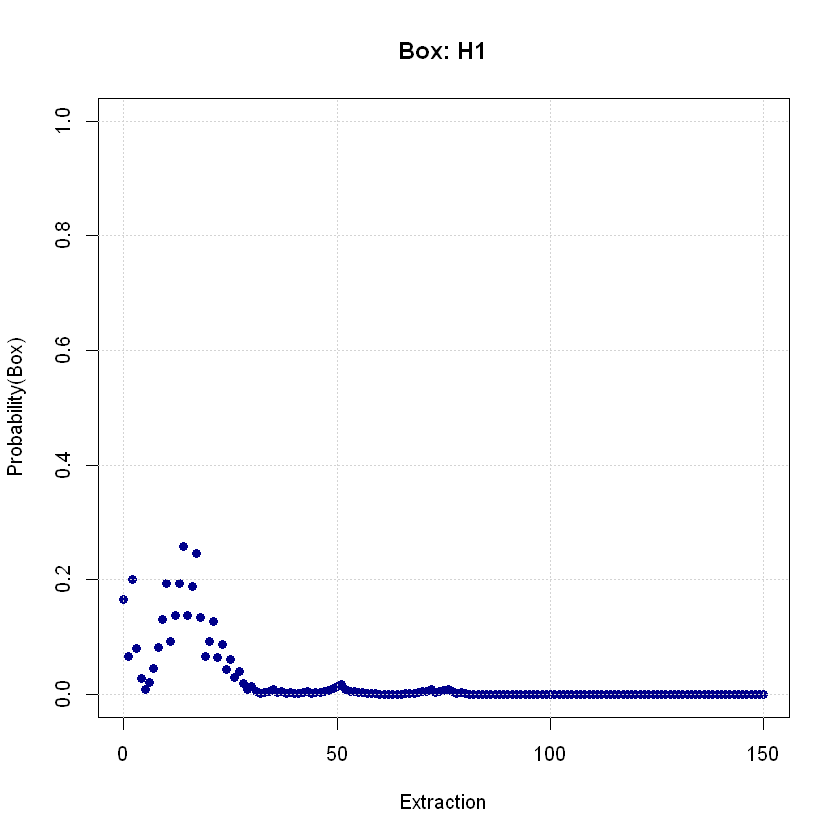

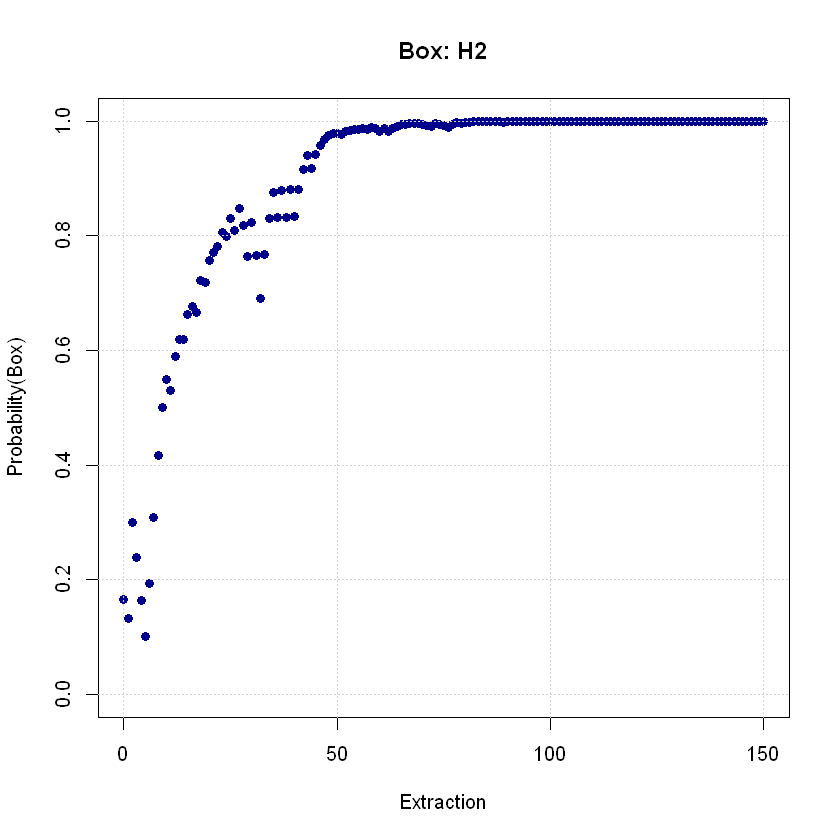

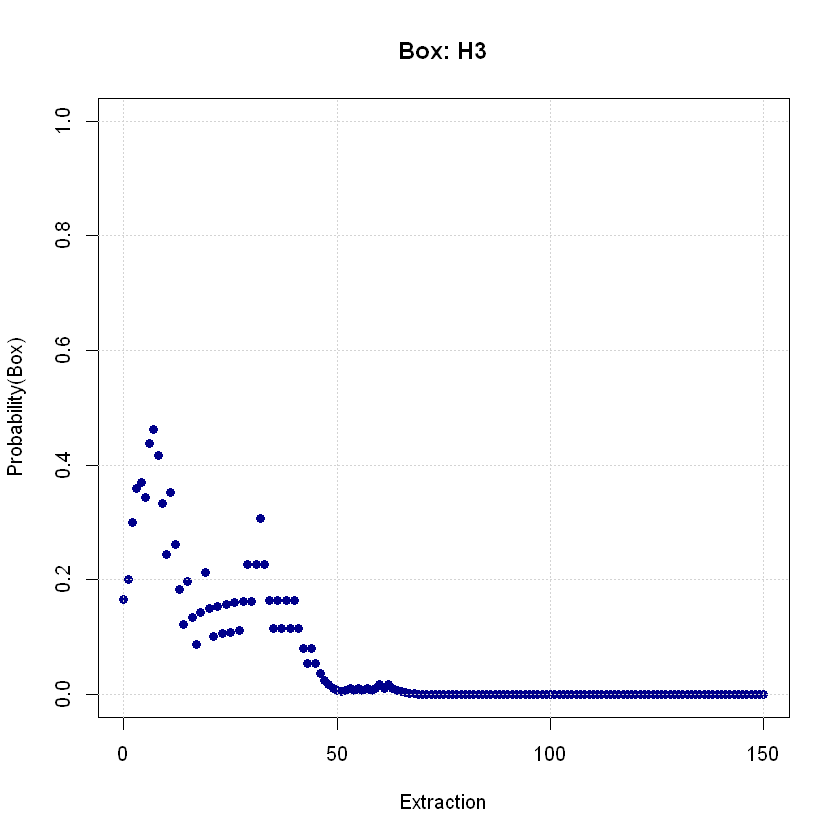

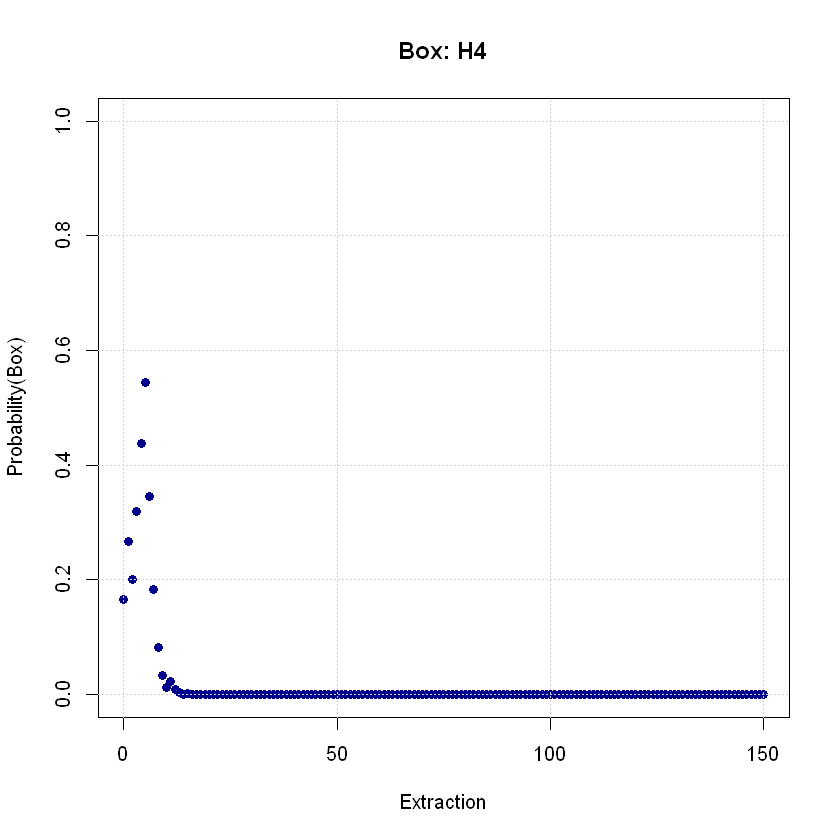

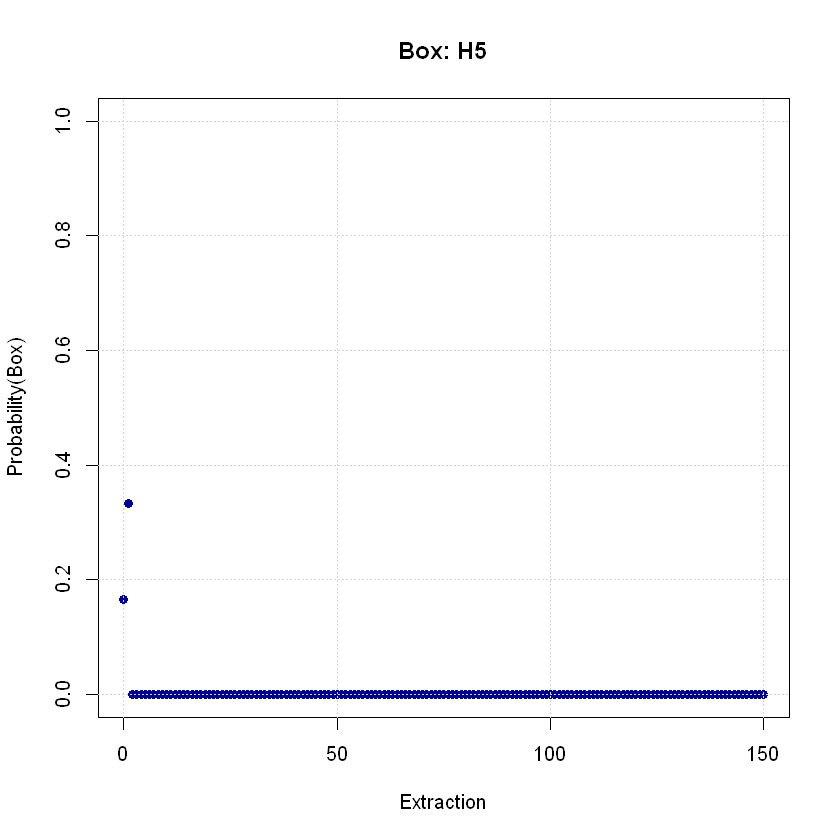

In [2]:
library(tidyverse)
Box<-sample(0:5, size=1)  
H<-c(rep(0, Box), rep(1, 5-Box))
cat("Box: ", H, "\n")
iter<-readline(prompt="Enter the number of extractions: ") %>% as.numeric()


White<-function(T, k){
    i<-0:5
    E<-sum((i/5)*T[k, i+3])
    for(j in 0:5){
        T[k+1, j+3]<-((j/5)*T[k, j+3])/E
    }
    return(T)
}
Black<-function(T, k){
    i<-0:5
    E<-sum(((5-i)/5)*T[k, i+3])
    for(j in 0:5){
        T[k+1, j+3]<-(((5-j)/5)*T[k, j+3])/E
    }
    return(T)
}
P<-function(T, i){
    plot(x=T[[1]], y=T[[i]], cex=1, pch=19,  col="darkblue", xlab="Extraction", 
         ylab="Probability(Box)", main = paste("Box:", names(T[i])), ylim=range(0, 1))
    grid()
}


PH<-tibble("Trial"=0, "Event"="-", "H0"=1/6, "H1"=1/6, "H2"=1/6, "H3"=1/6, "H4"=1/6, "H5"=1/6)
set.seed(89540)
Random<-sample(1:5, size=iter, replace=TRUE)     
for(k in 1:iter){
    PH<-add_row(PH, "Trial"=k, "Event"=H[Random[k]])
    if(H[Random[k]]==1){
        PH<-Black(PH, k)
    }else{
        PH<-White(PH, k)
    }
}

PH
for(i in 3:8){P(PH, i)}

In [11]:
ErlSample<-function(iter, alpha, beta){
    Erl<-NULL
    for(i in 1:iter){
        U<-runif(alpha)
        Y<-beta*log(prod(U))
        Erl<-c(Erl, -Y)
    }
    return(Erl)
}

#sample<-ErlSample(10^4, 2, 2)
#sample
#hist(sample)

In [10]:
#Idem of the previous
#shape -> natural number (from Gamma to Erlang distribution)
sample<-rgamma(10^4, shape=2, scale=2)

#sample
#hist(sample)

In [8]:
library(tidyverse)
seed<-readline(prompt="Enter an integer seed (6 digits): ")
iter<-readline(prompt="Enter the number of iterations: ") %>% as.numeric()

options(scipen = 999)
MiddleSquare<-function(seed, iter){
    for(i in 1:iter) {
        seed<-as.numeric(seed)
        sq<-seed^2 
        x<-strsplit(as.character(sq), split="") %>% unlist() %>% as.numeric()
        x<-c(rep(0, 12-length(x)), x)
        x<-x[4:9]
        seed<-paste(x, collapse="")
        cat("\n", seed)
  }
}
MiddleSquare(seed, iter)

Enter an integer seed (6 digits): 582009
Enter the number of iterations: 30

 734476
 454994
 019540
 381811
 779639
 836970
 518780
 132688
 606105
 363271
 965819
 806340
 184195
 927798
 809128
 688120
 509134
 217429
 275370
 828636
 637620
 559264
 776221
 519040
 402521
 023155
 536154
 461111
 623354
 570209